Determining the survival posaibalitiy


In [ ]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sas
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
titanic_data=pd.read_csv('/content/titanic_data.csv')

In [ ]:
titanic_data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
titanic_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
titanic_data[0:3]

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500   NaN        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250   NaN        S

In [ ]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
titanic_data[titanic_data.isnull().any(axis=1)]

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0       3    male  22.0      1      0   7.2500   NaN        S
2           1       3  female  26.0      0      0   7.9250   NaN        S
4           0       3    male  35.0      0      0   8.0500   NaN        S
5           0       3    male   NaN      0      0   8.4583   NaN        Q
7           0       3    male   2.0      3      1  21.0750   NaN        S
..        ...     ...     ...   ...    ...    ...      ...   ...      ...
884         0       3    male  25.0      0      0   7.0500   NaN        S
885         0       3  female  39.0      0      5  29.1250   NaN        Q
886         0       2    male  27.0      0      0  13.0000   NaN        S
888         0       3  female   NaN      1      2  23.4500   NaN        S
890         0       3    male  32.0      0      0   7.7500   NaN        Q

[708 rows x 9 columns]

In [ ]:
titanic_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [ ]:
titanic_data.dropna(axis=1,inplace=True)

In [ ]:
titanic_data.shape

(891, 6)

Creating a Dummy Column

In [ ]:
Sex_Dummy=pd.get_dummies(titanic_data['Sex'], dtype=float,drop_first=True)
Sex_Dummy

male
0     1.0
1     0.0
2     0.0
3     0.0
4     1.0
..    ...
886   1.0
887   0.0
888   0.0
889   1.0
890   1.0

[891 rows x 1 columns]

0=Female and 1=Male

In [ ]:
titanic_data=pd.concat([titanic_data,Sex_Dummy],axis=1)

In [ ]:
titanic_data

Survived  Pclass     Sex  SibSp  Parch     Fare  male
0           0       3    male      1      0   7.2500   1.0
1           1       1  female      1      0  71.2833   0.0
2           1       3  female      0      0   7.9250   0.0
3           1       1  female      1      0  53.1000   0.0
4           0       3    male      0      0   8.0500   1.0
..        ...     ...     ...    ...    ...      ...   ...
886         0       2    male      0      0  13.0000   1.0
887         1       1  female      0      0  30.0000   0.0
888         0       3  female      1      2  23.4500   0.0
889         1       1    male      0      0  30.0000   1.0
890         0       3    male      0      0   7.7500   1.0

[891 rows x 7 columns]

In [ ]:
titanic_data = titanic_data.loc[:, ~titanic_data.columns.duplicated()]


In [ ]:
titanic_data.drop('Sex',axis=1,inplace=True)

In [ ]:
titanic_data.rename({'male':'Sex_Dummy'},axis=1,inplace=True)

In [ ]:
titanic_data[0:3]

Survived  Pclass  SibSp  Parch     Fare  Sex_Dummy
0         0       3      1      0   7.2500        1.0
1         1       1      1      0  71.2833        0.0
2         1       3      0      0   7.9250        0.0

Creating a Model

In [ ]:
x=titanic_data.iloc[:,1:] #independent variable
print(x)
y=titanic_data.iloc[:,0] #depedent variable
print(y)

     Pclass  SibSp  Parch     Fare  Sex_Dummy
0         3      1      0   7.2500        1.0
1         1      1      0  71.2833        0.0
2         3      0      0   7.9250        0.0
3         1      1      0  53.1000        0.0
4         3      0      0   8.0500        1.0
..      ...    ...    ...      ...        ...
886       2      0      0  13.0000        1.0
887       1      0      0  30.0000        0.0
888       3      1      2  23.4500        0.0
889       1      0      0  30.0000        1.0
890       3      0      0   7.7500        1.0

[891 rows x 5 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
# Creating the modelso that we can fit the values into it
from sklearn.linear_model import LogisticRegression
logimodel=LogisticRegression()
model=logimodel.fit(x,y)

In [ ]:
logimodel.coef_

array([[-0.81022497, -0.24822014, -0.07692163,  0.00352514, -2.65440211]])

In [ ]:
Beta_Cofficient=pd.Series(logimodel.coef_[0])
Beta_Cofficient

0   -0.810225
1   -0.248220
2   -0.076922
3    0.003525
4   -2.654402
dtype: float64

In [ ]:
logimodel.intercept_

array([3.01493079])

In [ ]:
logimodel.classes_

array([0, 1])

In [ ]:
import numpy as np
np.set_printoptions(suppress=True)
pred_prob=logimodel.predict_proba(x)
pred_prob

array([[0.90827974, 0.09172026],
       [0.099055  , 0.900945  ],
       [0.3515592 , 0.6484408 ],
       ...,
       [0.43417015, 0.56582985],
       [0.58514782, 0.41485218],
       [0.88522076, 0.11477924]])

In [ ]:
pred_prob=pd.DataFrame(pred_prob)
pred_prob.rename({0:'Probability of the survival',1:'Probability of not survival'},axis=1,inplace=True)
pred_prob['Prediction_Manually']=pred_prob.iloc[:,1].apply(lambda x: 0 if x<0.5 else 1)
pred_prob['Prediction_Model']=logimodel.predict(x)
pred_prob['Prediction_Conclusion']=pred_prob.iloc[:,2].apply(lambda x: "Survived" if x==0 else "Not survived")
pred_prob

Probability of the survival  Probability of not survival  \
0                       0.908280                     0.091720   
1                       0.099055                     0.900945   
2                       0.351559                     0.648441   
3                       0.104924                     0.895076   
4                       0.885113                     0.114887   
..                           ...                          ...   
886                     0.771023                     0.228977   
887                     0.090260                     0.909740   
888                     0.434170                     0.565830   
889                     0.585148                     0.414852   
890                     0.885221                     0.114779   

     Prediction_Manually  Prediction_Model Prediction_Conclusion  
0                      0                 0              Survived  
1                      1                 1          Not survived  
2                      1                 1          Not survived  
3                      1                 1          Not survived  
4                      0                 0              Survived  
..                   ...               ...                   ...  
886                    0                 0              Survived  
887                    1                 1          Not survived  
888                    1                 1          Not survived  
889                    0                 0              Survived  
890                    0                 0              Survived  

[891 rows x 5 columns]

In [ ]:
# prediction value of the x
y_pred=logimodel.predict(x)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [ ]:
y_pred_df=pd.DataFrame({'Actual':y,'Prediction':logimodel.predict(x)})
y_pred_df
y_pred_df['Actual Conclusion']=pred_prob.iloc[:,0].apply(lambda x: "Survived" if x==0 else "Not survived")
y_pred_df['Model Conclusion']=pred_prob.iloc[:,1].apply(lambda x: "Survived" if x==0 else "Not survived")
Outcome=[]
for i in range(len(y_pred_df)):
 if(y_pred_df.loc[i,'Actual']==0 & y_pred_df.loc[i,'Prediction']==0):
    Outcome.append('True Negative')
 elif (y_pred_df.loc[i,'Actual']==1 &y_pred_df.loc[i,'Prediction']==1):
    Outcome.append('True Positive')
 elif (y_pred_df.loc[i,'Actual']==0 &y_pred_df.loc[i,'Prediction']==1):
   Outcome.append('False Positive')
 elif (y_pred_df.loc[i,'Actual']==1 &y_pred_df.loc[i,'Prediction']==0):
   Outcome.append('False Negative')
 else:
   Outcome.append('Not valid')


In [ ]:
y_pred_df['Outcome']=Outcome
y_pred_df[0:12]

Actual  Prediction Actual Conclusion Model Conclusion        Outcome
0        0           0      Not survived     Not survived  True Negative
1        1           1      Not survived     Not survived  True Positive
2        1           1      Not survived     Not survived  True Positive
3        1           1      Not survived     Not survived  True Positive
4        0           0      Not survived     Not survived  True Negative
5        0           0      Not survived     Not survived  True Negative
6        0           0      Not survived     Not survived  True Negative
7        0           0      Not survived     Not survived  True Negative
8        1           1      Not survived     Not survived  True Positive
9        1           1      Not survived     Not survived  True Positive
10       1           1      Not survived     Not survived  True Positive
11       1           1      Not survived     Not survived  True Positive

In [ ]:
#checking the accuracy of the model we going to create classfiction report and confusion matrix
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       549
           1       0.76      0.68      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.77      0.78       891
weighted avg       0.79      0.80      0.79       891



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[477,  72],
       [110, 232]])

In [ ]:
# we can also calculate the accuracy from the sklearn model
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.7957351290684624

In [ ]:
from sklearn.metrics import f1_score
f1_score(y,y_pred)

0.718266253869969

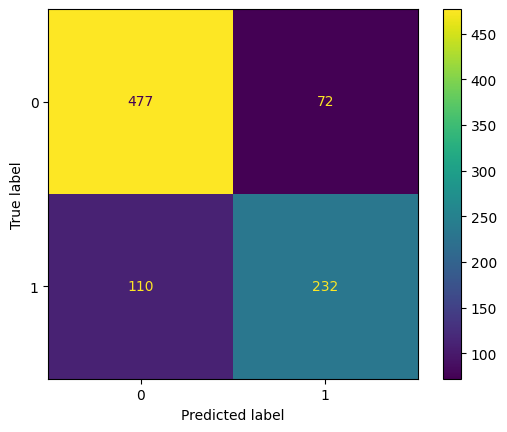

In [ ]:
y_pred = logimodel.predict(x)
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y,y_pred,labels=[0,1])
cm_display= ConfusionMatrixDisplay(confusion_matrix=cm)
print(cm_display)
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

Now Apply the model on the test data

In [ ]:
df=pd.read_csv('/content/Titanic_test.csv')
df[0:4]

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   
3          895       3                  Wirz, Mr. Albert    male  27.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q  
3      0  315154  8.6625   NaN        S

In [ ]:
df.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)

In [ ]:
df[0:4]
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [ ]:
Sex_d=pd.get_dummies(df['Sex'],drop_first=True,dtype=float)
df['Sex_d']=Sex_d
df[0:4]
Emb_d=pd.get_dummies(df['Embarked'],drop_first=True,dtype=float)
Emb_d
df['Emb_Q']=Emb_d.iloc[:,0]
df[0:4]
df['Emb_S']=Emb_d.iloc[:,1]
df[0:4]
df.drop(['Sex','Embarked'],axis=1,inplace=True)
df[0:4]


KeyError: 'Sex'

In [ ]:
df.drop(['Ticket','Fare'],axis=1,inplace=True)


KeyError: "['Ticket', 'Fare'] not found in axis"

In [ ]:
df[0:4]


Pclass   Age  SibSp  Parch  Sex_d  Emb_Q  Emb_S
0       3  34.5      0      0    1.0    1.0    0.0
1       3  47.0      1      0    0.0    0.0    1.0
2       2  62.0      0      0    1.0    1.0    0.0
3       3  27.0      0      0    1.0    0.0    1.0

In [ ]:
x=titanic_data.iloc[:,1:] #independent variable
print(x)

     Pclass  SibSp  Parch     Fare  Sex_Dummy
0         3      1      0   7.2500        1.0
1         1      1      0  71.2833        0.0
2         3      0      0   7.9250        0.0
3         1      1      0  53.1000        0.0
4         3      0      0   8.0500        1.0
..      ...    ...    ...      ...        ...
886       2      0      0  13.0000        1.0
887       1      0      0  30.0000        0.0
888       3      1      2  23.4500        0.0
889       1      0      0  30.0000        1.0
890       3      0      0   7.7500        1.0

[891 rows x 5 columns]


In [ ]:
#Split the data
x_test=df.iloc[:,0:6]
print(x_test)
#In test data I should have the similar columns as in train data

print(x_test)

     Pclass   Age  SibSp  Parch  Sex_d  Emb_Q
0         3  34.5      0      0    1.0    1.0
1         3  47.0      1      0    0.0    0.0
2         2  62.0      0      0    1.0    1.0
3         3  27.0      0      0    1.0    0.0
4         3  22.0      1      1    0.0    0.0
..      ...   ...    ...    ...    ...    ...
413       3   NaN      0      0    1.0    0.0
414       1  39.0      0      0    0.0    0.0
415       3  38.5      0      0    1.0    0.0
416       3   NaN      0      0    1.0    0.0
417       3   NaN      1      1    1.0    0.0

[418 rows x 6 columns]
None
     Pclass  SibSp  Parch  Sex_d  Emb_Q
0         3      0      0    1.0    1.0
1         3      1      0    0.0    0.0
2         2      0      0    1.0    1.0
3         3      0      0    1.0    0.0
4         3      1      1    0.0    0.0
..      ...    ...    ...    ...    ...
413       3      0      0    1.0    0.0
414       1      0      0    0.0    0.0
415       3      0      0    1.0    0.0
416       3      0 

In [ ]:
#We have to remove the Emb_Q column and add Fare
print(x_test.drop('Emb_Q',axis=1,inplace=True))


KeyError: "['Emb_Q'] not found in axis"

In [ ]:
print(x_test)
x_test.rename({'Sex_d':'Sex_Dummy'},axis=1,inplace=True)
print(x_test)
x_test['Fare']=titanic_data['Fare']
print(x_test)
x_test.rename({'Sex_dummy':'Sex_Dummy'},axis=1,inplace=True)
print(x_test)


     Pclass  SibSp  Parch  Sex_Dummy     Fare
0         3      0      0        1.0   7.2500
1         3      1      0        0.0  71.2833
2         2      0      0        1.0   7.9250
3         3      0      0        1.0  53.1000
4         3      1      1        0.0   8.0500
..      ...    ...    ...        ...      ...
413       3      0      0        1.0   0.0000
414       1      0      0        0.0   7.9250
415       3      0      0        1.0   8.0500
416       3      0      0        1.0  32.5000
417       3      1      1        1.0  13.0000

[418 rows x 5 columns]
     Pclass  SibSp  Parch  Sex_Dummy     Fare
0         3      0      0        1.0   7.2500
1         3      1      0        0.0  71.2833
2         2      0      0        1.0   7.9250
3         3      0      0        1.0  53.1000
4         3      1      1        0.0   8.0500
..      ...    ...    ...        ...      ...
413       3      0      0        1.0   0.0000
414       1      0      0        0.0   7.9250
415       

In [ ]:
#This is the train data where you had used trained data
logimodel=LogisticRegression()
logimodel.fit(x,y)



LogisticRegression()

In [ ]:
print(x)
print(x_test)
#Reordering the columns as same as in the train data
x.columns #these are the columns of the training data
train_columns=x.columns
x_test=x_test[train_columns]
print(x_test)

     Pclass  SibSp  Parch     Fare  Sex_Dummy
0         3      1      0   7.2500        1.0
1         1      1      0  71.2833        0.0
2         3      0      0   7.9250        0.0
3         1      1      0  53.1000        0.0
4         3      0      0   8.0500        1.0
..      ...    ...    ...      ...        ...
886       2      0      0  13.0000        1.0
887       1      0      0  30.0000        0.0
888       3      1      2  23.4500        0.0
889       1      0      0  30.0000        1.0
890       3      0      0   7.7500        1.0

[891 rows x 5 columns]
     Pclass  SibSp  Parch  Sex_Dummy     Fare
0         3      0      0        1.0   7.2500
1         3      1      0        0.0  71.2833
2         2      0      0        1.0   7.9250
3         3      0      0        1.0  53.1000
4         3      1      1        0.0   8.0500
..      ...    ...    ...        ...      ...
413       3      0      0        1.0   0.0000
414       1      0      0        0.0   7.9250
415       

In [ ]:
#Now the model is giing to predicting on the test data set
test_data=logimodel.predict(x_test)
#Build a data frame for this
test_data_df=pd.DataFrame({'Prediction':test_data})
test_data_df
test_data_df['Prediction_Model']=test_data_df.iloc[:,0].apply(lambda x: "Survived" if x==0 else "Not survived")
test_data_df

Prediction Prediction_Model
0             0         Survived
1             1     Not survived
2             0         Survived
3             0         Survived
4             1     Not survived
..          ...              ...
413           0         Survived
414           1     Not survived
415           0         Survived
416           0         Survived
417           0         Survived

[418 rows x 2 columns]

In [ ]:
#Now add these two predection to the text data
x_test['Survival']=test_data_df.iloc[:,0]
x_test['Survival Result']=test_data_df.iloc[:,1]
x_test

Pclass  SibSp  Parch     Fare  Sex_Dummy  Survival Survival Result
0         3      0      0   7.2500        1.0         0        Survived
1         3      1      0  71.2833        0.0         1    Not survived
2         2      0      0   7.9250        1.0         0        Survived
3         3      0      0  53.1000        1.0         0        Survived
4         3      1      1   8.0500        0.0         1    Not survived
..      ...    ...    ...      ...        ...       ...             ...
413       3      0      0   0.0000        1.0         0        Survived
414       1      0      0   7.9250        0.0         1    Not survived
415       3      0      0   8.0500        1.0         0        Survived
416       3      0      0  32.5000        1.0         0        Survived
417       3      1      1  13.0000        1.0         0        Survived

[418 rows x 7 columns]

Now We are deploying the model

In [ ]:
import joblib

# Assuming your trained model is named 'model'
joblib.dump(model, 'logistic_model.pkl')

['logistic_model.pkl']

Create a Streem Lite App

In [ ]:
!pip install streamlit
import streamlit as st
import pandas as pd
import joblib



In [ ]:
# Load the trained model
model = joblib.load('logistic_model.pkl')

# Title
st.title("Titanic Survival Prediction")

# Sidebar input features
Pclass = st.selectbox("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)", [1, 2, 3])
Sex = st.selectbox("Sex", ['male', 'female'])

#This is done because the user may not know in which case wether he or she has to enter in the side bar so in which evver case they enter it will conver into lower case.
Sex_input = st.text_input("Sex (male/female):", "")

# Standardize input
Sex = Sex_input.strip().lower()

Age = st.slider("Age", 0, 100, 25)
Fare = st.number_input("Fare", value=50.0)

# Convert categorical to numeric
Sex = 1 if Sex == 'male' else 0

# Create dataframe from inputs
input_df = pd.DataFrame({
    'Pclass': [Pclass],
    'Sex': [Sex],
    'Age': [Age],
    'Fare': [Fare]
})

# Predict button
if st.button("Predict"):
    prediction = model.predict(input_df)
    result = "Survived" if prediction[0] == 1 else "Did not Survive"
    st.success(f"Prediction: {result}")


2025-04-05 06:51:51.189 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 06:51:51.190 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 06:51:51.192 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 06:51:51.193 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 06:51:51.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 06:51:51.197 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 06:51:51.198 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 06:51:51.200 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


1. What is the difference between precision and recall?
High Precessionmeans few false positive.
High Recall means few false negative.

2. What is cross-validation, and why is it important in binary classification?
Cross-validation is a technique to evaluate how well your model generalizes to unseen data — without needing a separate test set right away.
1.More Reliabel Accuracy.
2.Detect Overfitting.
3.Work Well with imbalance Data.